## Exploratory Data Analysis

# Importasi Library

In [1]:
#Import library untuk data preparation dan visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import pickle and json file for columns and model file
import pickle
import json
import joblib
import statistics

from scipy.stats import ttest_ind                     # import scipy stats untuk uji statistik
from scipy.stats import t    

# Import Data

Import data dengan format pickle dan akan diload menjadi dataframe sesuai dengan format save sebelumnya

In [2]:
#Import data yang sudah dibuat sebelumnya dari proses data preparation
X_train = joblib.load("C:\\Users\\hp\\Portofolio Data Science\\4 - Vehicle Price Prediction\\dataset\\2 - processed\\X_train.pkl")
y_train = joblib.load("C:\\Users\\hp\\Portofolio Data Science\\4 - Vehicle Price Prediction\\dataset\\2 - processed\\y_train.pkl")

In [3]:
#Sanity Check Data
X_train

,year,km_driven,fuel,seller_type,transmission,owner
791,2016,12000,Petrol,Individual,Manual,First Owner
2704,2014,50000,Diesel,Individual,Manual,First Owner
1266,2012,130000,Diesel,Individual,Manual,Second Owner
239,2012,100000,Diesel,Individual,Manual,Second Owner
2929,2002,70000,Petrol,Individual,Manual,Second Owner
...,...,...,...,...,...,...
1593,2016,40000,Diesel,Individual,Manual,First Owner
4060,2014,100000,Diesel,Individual,Manual,Second Owner
1346,2010,100000,Diesel,Individual,Manual,Second Owner
3454,2017,110000,Diesel,Individual,Automatic,First Owner


In [4]:
#Sanity Check Data
y_train

791      350000
2704    1800000
1266     190000
239      220000
2929      80000
         ...   
1593    1000000
4060     600000
1346     200000
3454     710000
3582     220000
Name: selling_price, Length: 3038, dtype: int64

## Menggabungkan Data untuk dijadikan Set EDA

In [5]:
#Menggabungkan x train dan y train untuk keperluan EDA
train_set = pd.merge(X_train, y_train, left_index=True, right_index=True)
#Sanity Check Data
train_set

,year,km_driven,fuel,seller_type,transmission,owner,selling_price
791,2016,12000,Petrol,Individual,Manual,First Owner,350000
2704,2014,50000,Diesel,Individual,Manual,First Owner,1800000
1266,2012,130000,Diesel,Individual,Manual,Second Owner,190000
239,2012,100000,Diesel,Individual,Manual,Second Owner,220000
2929,2002,70000,Petrol,Individual,Manual,Second Owner,80000
...,...,...,...,...,...,...,...
1593,2016,40000,Diesel,Individual,Manual,First Owner,1000000
4060,2014,100000,Diesel,Individual,Manual,Second Owner,600000
1346,2010,100000,Diesel,Individual,Manual,Second Owner,200000
3454,2017,110000,Diesel,Individual,Automatic,First Owner,710000


In [6]:
# Melihat informasi statistika deskriptif
train_set.describe()

,year,km_driven,selling_price
count,3038.000000,3038.000000,3.038000e+03
mean,2013.123107,66508.047400,5.031213e+05
std,4.203655,47861.361669,5.707304e+05
min,1992.000000,1.000000,2.200000e+04
25%,2011.000000,35000.000000,2.100000e+05
50%,2014.000000,60000.000000,3.600000e+05
75%,2016.000000,90000.000000,6.000000e+05
max,2020.000000,806599.000000,8.150000e+06


## Cek Missing Value

In [7]:
train_set.isnull().sum()

year             0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
selling_price    0
dtype: int64

## Cek Informasi Statistic

In [8]:
# cek skewness
train_set.skew(numeric_only = True)

year            -0.871237
km_driven        3.094609
selling_price    4.700219
dtype: float64

Rules : 
* jika kolom mendapati skewnya sebesar > +- 0.5, maka dari itu kolom tersebut akan diimputasi dengan median
* jika kolom mendapati skewnya sebesar <= +- 0.5 kolom lainnya akan diimputasi dengan mean

Imputasi Median :
* km_driven              

Imputasi Mean :
* year                    

## Melihat Distribusi Data

### Plot distribusi

C:\Users\hp\AppData\Local\Temp\ipykernel_12788\3699320127.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train_set[col], shade=True)


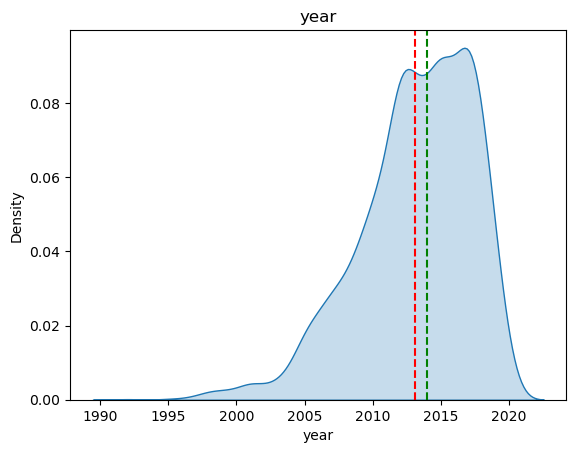

C:\Users\hp\AppData\Local\Temp\ipykernel_12788\3699320127.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train_set[col], shade=True)


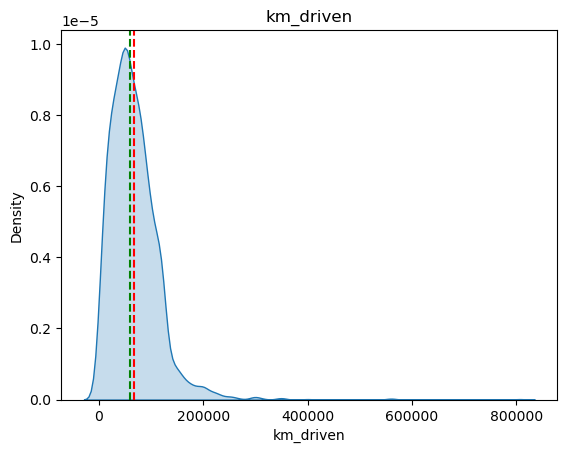

C:\Users\hp\AppData\Local\Temp\ipykernel_12788\3699320127.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train_set[col], shade=True)


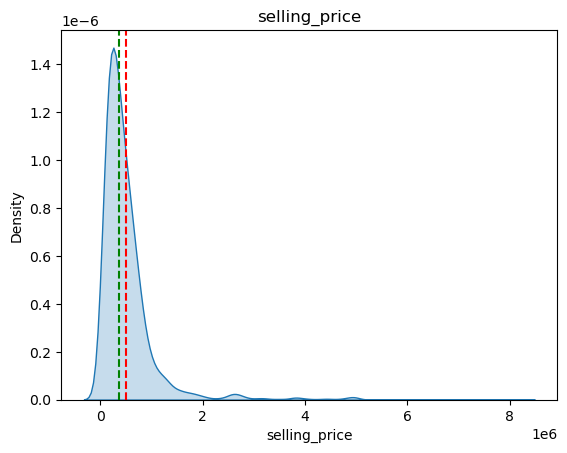

In [9]:
# looping untuk melakukan visualisasi distribusi data setiap kolom menggunakan kdeplot dengan central tendency didalamnya
for col in train_set.columns:
    if train_set[col].dtype != 'object':
        ax = sns.kdeplot(train_set[col], shade=True)
        ax.axvline(train_set[col].mean(), color='red', linestyle='--')
        ax.axvline(train_set[col].median(), color='green', linestyle='--')
        ax.set_title(col)
        plt.show()

## Melihat Proporsi Data secara Jumlah dan Persentase

### Proporsi jumlah pada kolom Fuel

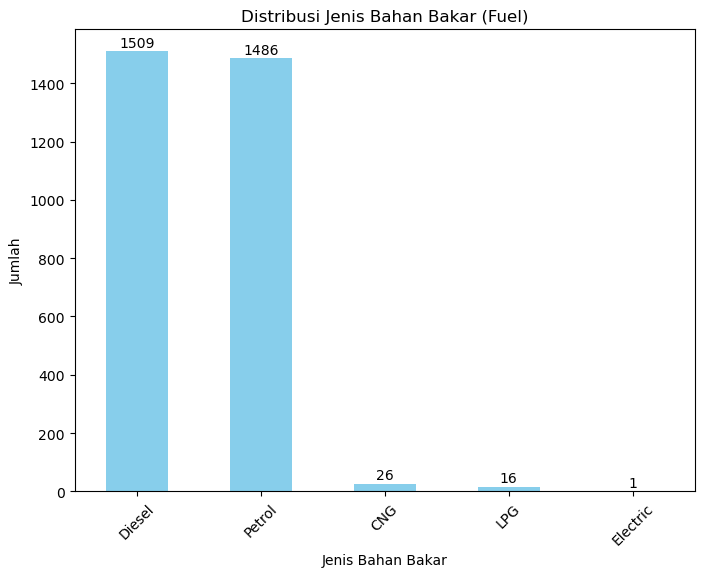

In [10]:
# Hitung jumlah kategori unik dalam kolom 'fuel'
fuel_counts = train_set['fuel'].value_counts()

# Buat grafik batang untuk kolom 'fuel'
plt.figure(figsize=(8, 6))
ax = fuel_counts.plot(kind='bar', color='skyblue')
plt.title('Distribusi Jenis Bahan Bakar (Fuel)')
plt.xlabel('Jenis Bahan Bakar')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)  # Untuk merotasi label agar terbaca lebih baik

# Menambahkan label jumlah di atas setiap batang
for i, count in enumerate(fuel_counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

### Proporsi jumlah pada kolom seller_type

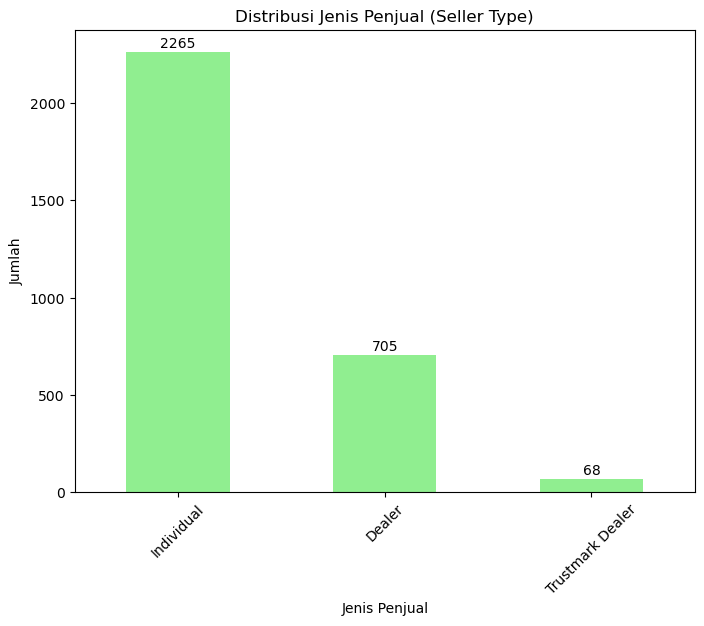

In [11]:
seller_type_counts = train_set['seller_type'].value_counts()

# Buat grafik batang untuk kolom 'fuel'
plt.figure(figsize=(8, 6))
ax = seller_type_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribusi Jenis Penjual (Seller Type)')
plt.xlabel('Jenis Penjual')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)  # Untuk merotasi label agar terbaca lebih baik

# Menambahkan label jumlah di atas setiap batang
for i, count in enumerate(seller_type_counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

plt.show()


### Proporsi jumlah pada kolom transmission

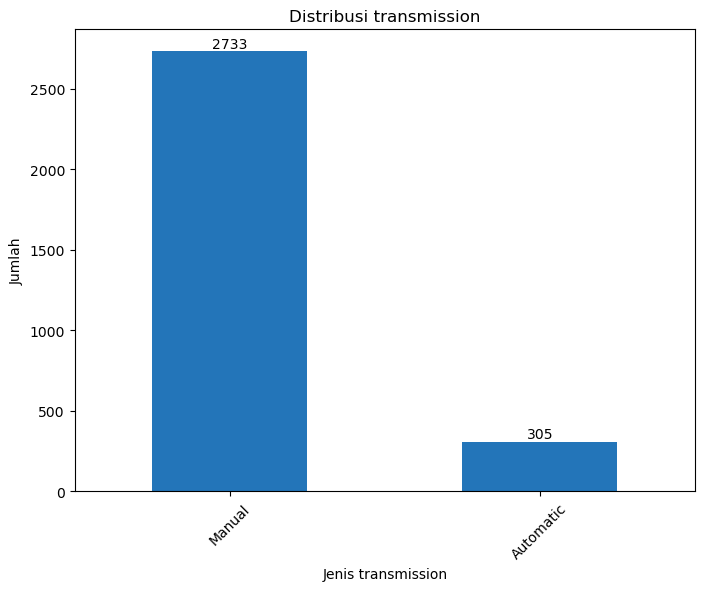

In [12]:
transmission_type_counts = train_set['transmission'].value_counts()

# Buat grafik batang untuk kolom 'fuel'
plt.figure(figsize=(8, 6))
ax = transmission_type_counts.plot(kind='bar', color='#2375b9')
plt.title('Distribusi transmission')
plt.xlabel('Jenis transmission')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)  # Untuk merotasi label agar terbaca lebih baik

# Menambahkan label jumlah di atas setiap batang
for i, count in enumerate(transmission_type_counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

plt.show()


### Proporsi jumlah pada kolom owner

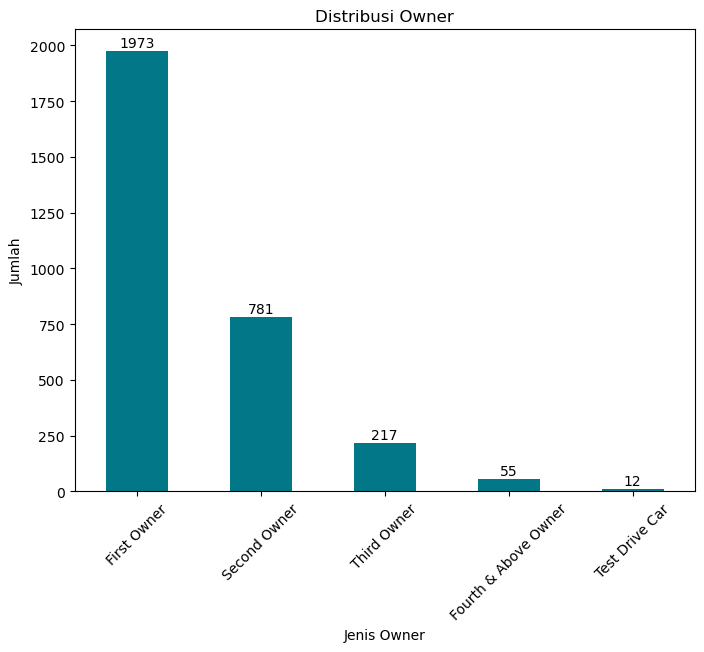

In [13]:
owner_counts = train_set['owner'].value_counts()

# Buat grafik batang untuk kolom 'fuel'
plt.figure(figsize=(8, 6))
ax = owner_counts.plot(kind='bar', color='#027787')
plt.title('Distribusi Owner')
plt.xlabel('Jenis Owner')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)  # Untuk merotasi label agar terbaca lebih baik

# Menambahkan label jumlah di atas setiap batang
for i, count in enumerate(owner_counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

plt.show()


In [22]:
"""
import pandas as pd
import matplotlib.pyplot as plt

# Daftar kolom kategorikal yang ingin Anda analisis
categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner']

# Menggunakan loop untuk menghitung dan memplot grafik batang untuk setiap kolom
for column in categorical_columns:
    # Hitung jumlah kategori unik dalam kolom
    column_counts = train_set[column].value_counts()

    # Buat grafik batang untuk kolom
    plt.figure(figsize=(8, 6))
    ax = column_counts.plot(kind='bar', color='lightgreen')
    plt.title(f'Distribusi {column.replace("_", " ").title()}')
    plt.xlabel(column.replace("_", " ").title())
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    
    # Menambahkan label jumlah di atas setiap batang
    for i, count in enumerate(column_counts):
        plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

    plt.show()
"""

'\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\n# Daftar kolom kategorikal yang ingin Anda analisis\ncategorical_columns = [\'fuel\', \'seller_type\', \'transmission\', \'owner\']\n\n# Menggunakan loop untuk menghitung dan memplot grafik batang untuk setiap kolom\nfor column in categorical_columns:\n    # Hitung jumlah kategori unik dalam kolom\n    column_counts = train_set[column].value_counts()\n\n    # Buat grafik batang untuk kolom\n    plt.figure(figsize=(8, 6))\n    ax = column_counts.plot(kind=\'bar\', color=\'lightgreen\')\n    plt.title(f\'Distribusi {column.replace("_", " ").title()}\')\n    plt.xlabel(column.replace("_", " ").title())\n    plt.ylabel(\'Jumlah\')\n    plt.xticks(rotation=45)\n    \n    # Menambahkan label jumlah di atas setiap batang\n    for i, count in enumerate(column_counts):\n        plt.text(i, count + 5, str(count), ha=\'center\', va=\'bottom\', fontsize=10)\n\n    plt.show()\n'

## Proporsi data kategori dalam bentuk persentase

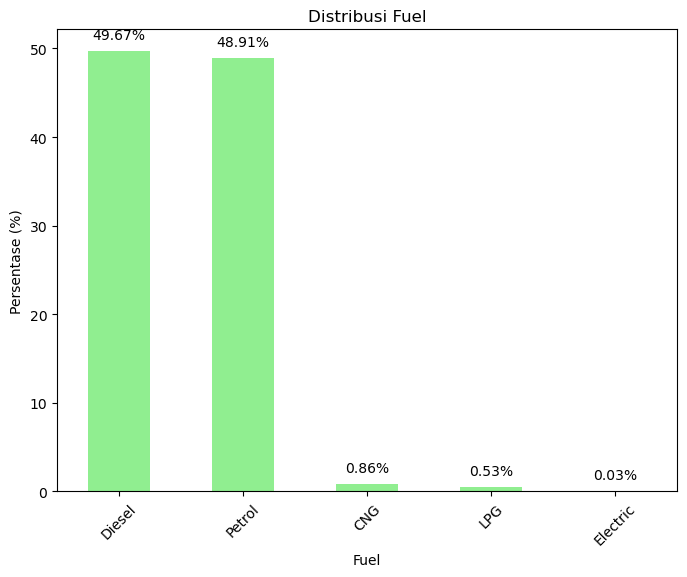

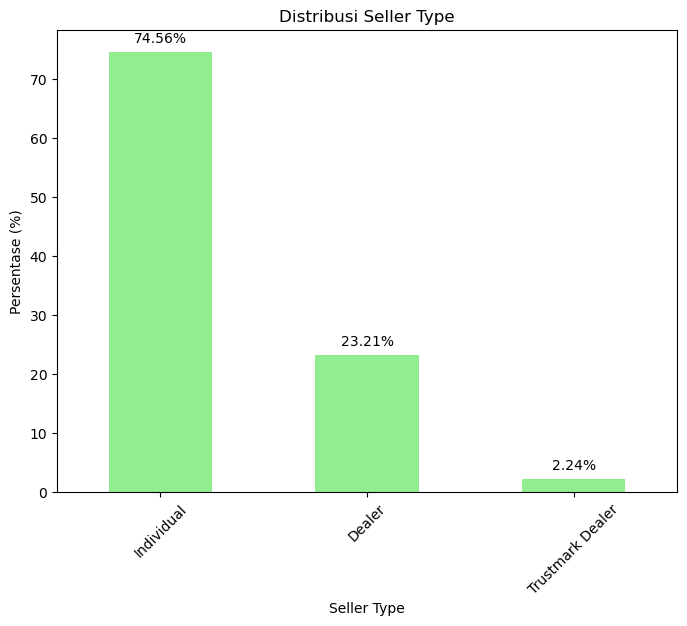

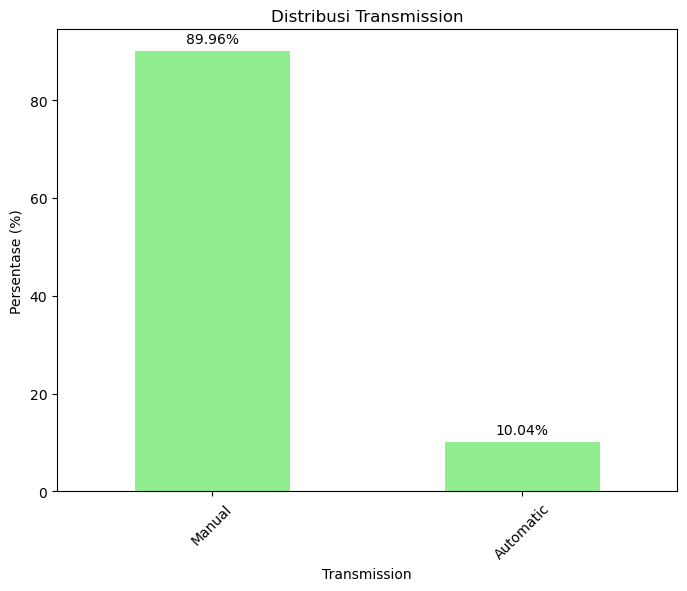

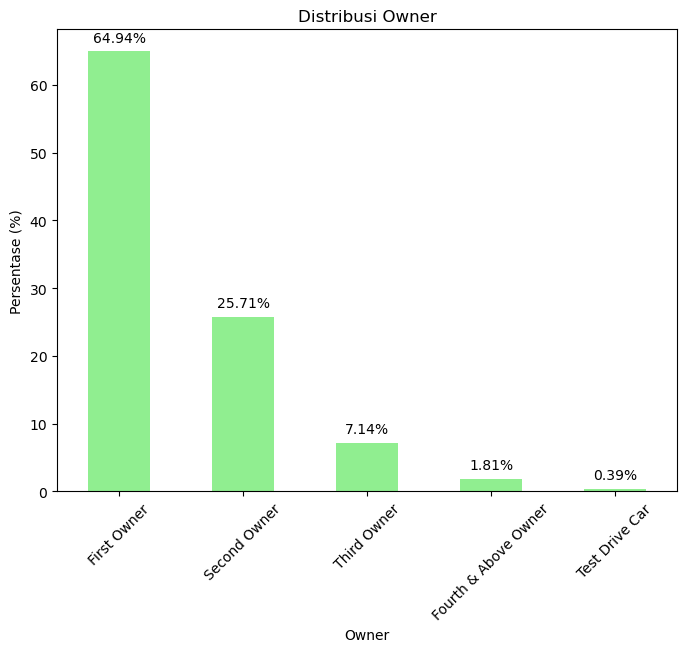

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Daftar kolom kategorikal yang ingin Anda analisis
categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner']

# Menggunakan loop untuk menghitung dan memplot grafik batang untuk setiap kolom
for column in categorical_columns:
    # Hitung jumlah kategori unik dalam kolom
    column_counts = train_set[column].value_counts()

    # Menghitung total data dalam kolom
    total_data = len(train_set[column])

    # Menghitung persentase untuk setiap kategori
    column_percentages = (column_counts / total_data) * 100

    # Buat grafik batang untuk kolom
    plt.figure(figsize=(8, 6))
    ax = column_percentages.plot(kind='bar', color='lightgreen')
    plt.title(f'Distribusi {column.replace("_", " ").title()}')
    plt.xlabel(column.replace("_", " ").title())
    plt.ylabel('Persentase (%)')
    plt.xticks(rotation=45)
    
    # Menambahkan label persentase di atas setiap batang
    for i, percentage in enumerate(column_percentages):
        plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=10)

    plt.show()

## Cek Korelasi

C:\Users\hp\AppData\Local\Temp\ipykernel_12788\3986407503.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_set.corr(method='pearson', min_periods=1),annot=True)


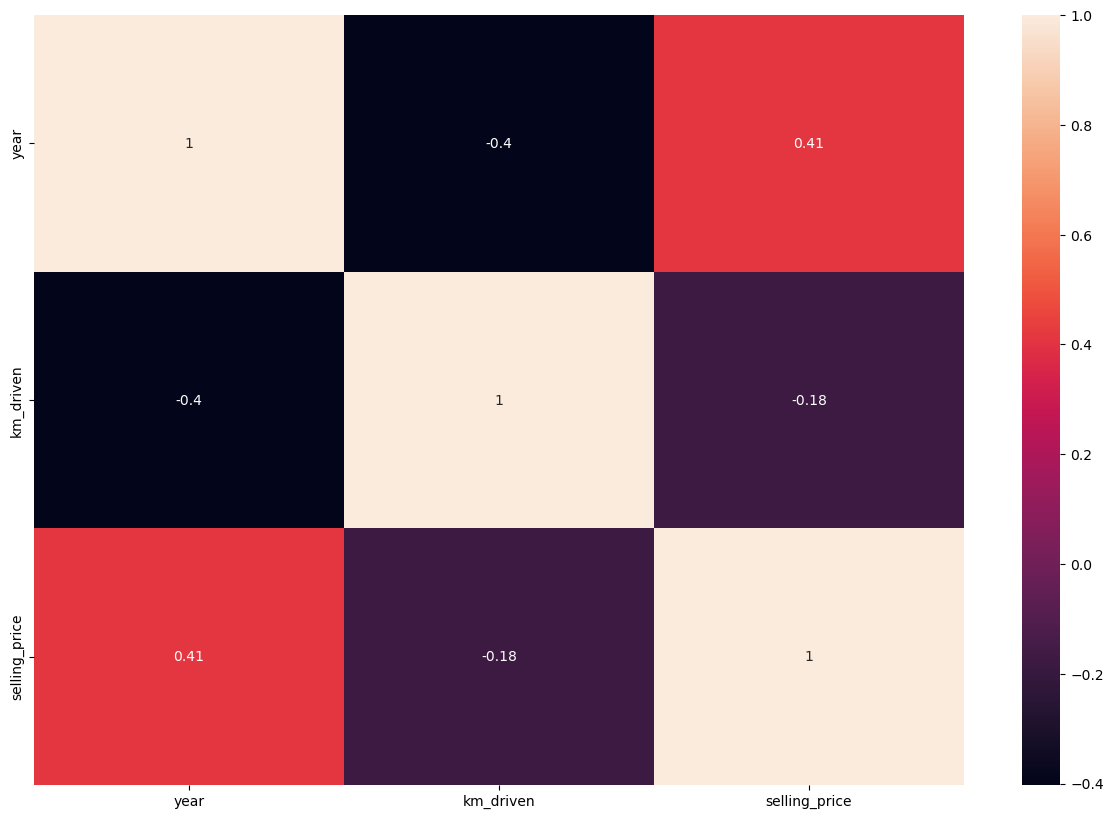

In [15]:
# pearson
plt.figure(figsize=(15,10))
sns.heatmap(train_set.corr(method='pearson', min_periods=1),annot=True)
plt.show()

## Cek Outlier dengan menggunakan Boxplot

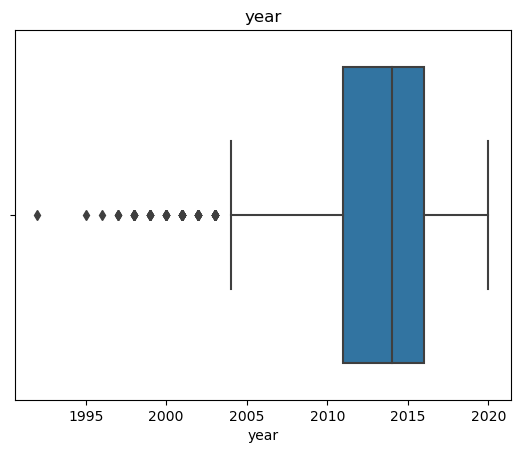

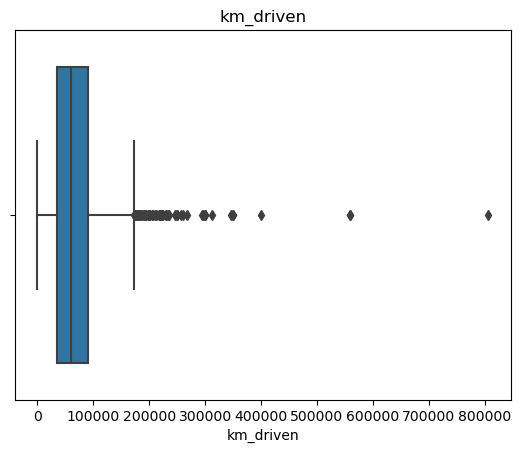

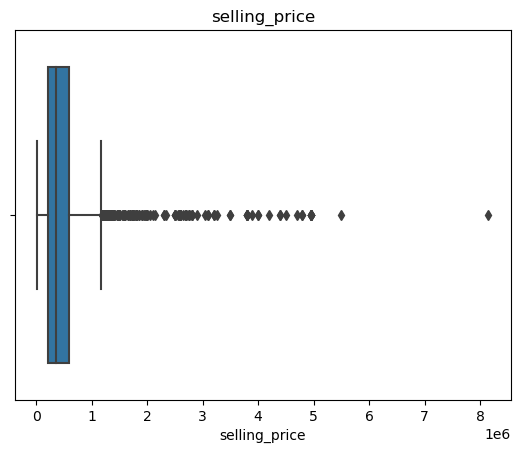

In [18]:
for col in train_set.columns:
    if train_set[col].dtype != 'object':
        ax = sns.boxplot(x=train_set[col])
        ax.set_title(col)
        plt.show()

## Uji Hipotesis dengan menggunakan metode Anova

### Membandingkan antar kelompok pada kolom Fuel berdasarkan selling_price

**Hipotesis Null ($H_0$)**: Rata-rata harga jual ('selling_price') antara berbagai kategori bahan bakar ('fuel') adalah sama.

$$ H_0: \mu_{\text{Petrol}} = \mu_{\text{Diesel}} = \mu_{\text{CNG}} = \mu_{\text{LPG}} = \mu_{\text{Electric}} $$

**Hipotesis Alternatif ($H_1$)**: Terdapat perbedaan signifikan dalam rata-rata harga jual ('selling_price') antara setidaknya dua kategori bahan bakar ('fuel').

$$ H_1: \text{Setidaknya satu } \mu_i \text{ berbeda dari yang lain} $$

Dalam hipotesis null, kita berasumsi bahwa tidak ada perbedaan signifikan dalam rata-rata harga jual antara kategori bahan bakar. Hipotesis alternatif menyatakan bahwa setidaknya satu dari rata-rata harga jual dalam kategori bahan bakar berbeda dari yang lainnya, yang mengindikasikan adanya perbedaan signifikan.

Uji Anova kemudian akan digunakan untuk menguji apakah terdapat perbedaan yang signifikan dalam rata-rata harga jual ('selling_price') antara kelompok kategori bahan bakar ('fuel').

In [20]:
# Menggunakan Anova untuk membandingkan 'selling_price' antara kategori 'fuel'
fuel_categories = train_set['fuel'].unique()
grouped_data = [train_set[train_set['fuel'] == category]['selling_price'] for category in fuel_categories]

# Melakukan uji Anova
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Menampilkan hasil uji statistik
print("Hasil Anova:")
print(f"Statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Menentukan apakah perbedaan signifikan
alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan signifikan dalam 'selling_price' antara kategori 'fuel'.")
else:
    print("Tidak terdapat perbedaan signifikan dalam 'selling_price' antara kategori 'fuel'.")

Hasil Anova:
Statistic: 72.66413646718833
P-value: 7.1532626762093115e-59
Terdapat perbedaan signifikan dalam 'selling_price' antara kategori 'fuel'.


Hasil Anova yang Anda sertakan menunjukkan bahwa ada perbedaan signifikan dalam 'selling_price' antara kategori 'fuel'. Untuk memahami lebih lanjut apa arti dari hasil ini, mari kita jelaskan beberapa konsep yang terlibat:

1. **Statistic (Statistik):** Nilai statistik ini adalah hasil dari perhitungan statistik yang digunakan dalam uji Anova. Dalam konteks ini, itu adalah angka 72.66413646718833.

2. **P-value (Nilai P):** P-value adalah nilai probabilitas yang dihasilkan dari uji statistik. Ini mengukur sejauh mana perbedaan yang diamati antara kelompok-kelompok (dalam hal ini, kategori 'fuel') adalah hasil dari variasi acak atau jika perbedaan tersebut signifikan secara statistik. Pada kasus ini, nilai p-value sangat rendah, yaitu 7.1532626762093115e-59 (sangat mendekati nol).

3. **Terdapat perbedaan signifikan:** Ketika p-value sangat rendah (umumnya kurang dari tingkat signifikansi yang telah ditentukan sebelumnya, dalam kasus ini 0.05), kita cenderung menolak hipotesis nol. Hipotesis nol dalam konteks ini adalah bahwa tidak ada perbedaan signifikan antara kelompok-kelompok. Dengan kata lain, hasil ini menunjukkan bahwa ada perbedaan signifikan dalam 'selling_price' antara kategori 'fuel'.

Dengan kata lain, Anda dapat mengatakan bahwa berdasarkan data yang Anda miliki, jenis bahan bakar (kategori 'fuel') berdampak signifikan pada harga jual ('selling_price'). Perbedaan dalam jenis bahan bakar pada kendaraan dapat signifikan mempengaruhi harga penjualan. Hal ini dapat menjadi informasi yang berguna dalam analisis data, terutama jika Anda ingin memahami faktor-faktor apa yang memengaruhi harga jual kendaraan.

### Membandingkan antar kelompok pada kolom seller_type berdasarkan selling_price

**Hipotesis Null ($H_0$)**: Rata-rata harga jual ('selling_price') antara berbagai kategori jenis penjual ('seller_type') adalah sama.

$$ H_0: \mu_{\text{Individual}} = \mu_{\text{Dealer}} = \mu_{\text{Trustmark Dealer}} $$

**Hipotesis Alternatif ($H_1$)**: Terdapat perbedaan signifikan dalam rata-rata harga jual ('selling_price') antara setidaknya dua kategori jenis penjual ('seller_type').

$$ H_1: \text{Setidaknya satu } \mu_i \text{ berbeda dari yang lain} $$

Dalam hipotesis null, kita berasumsi bahwa tidak ada perbedaan signifikan dalam rata-rata harga jual antara kategori jenis penjual. Hipotesis alternatif menyatakan bahwa setidaknya satu dari rata-rata harga jual dalam kategori jenis penjual berbeda dari yang lainnya, yang mengindikasikan adanya perbedaan signifikan.

Uji Anova kemudian akan digunakan untuk menguji apakah terdapat perbedaan yang signifikan dalam rata-rata harga jual ('selling_price') antara kelompok kategori jenis penjual ('seller_type').

In [21]:
# Menggunakan Anova untuk membandingkan 'selling_price' antara kategori 'seller_type'
seller_type_categories = train_set['seller_type'].unique()
grouped_data = [train_set[train_set['seller_type'] == category]['selling_price'] for category in seller_type_categories]

# Melakukan uji Anova
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Menampilkan hasil uji statistik
print("Hasil Anova:")
print(f"Statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Menentukan apakah perbedaan signifikan
alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan signifikan dalam 'selling_price' antara kategori 'seller_type'.")
else:
    print("Tidak terdapat perbedaan signifikan dalam 'selling_price' antara kategori 'seller_type'.")


Hasil Anova:
Statistic: 88.49718693640331
P-value: 4.4166996043279663e-38
Terdapat perbedaan signifikan dalam 'selling_price' antara kategori 'seller_type'.


Hasil Anova yang disajikan menunjukkan bahwa ada perbedaan signifikan dalam 'selling_price' antara berbagai kategori 'seller_type'. Untuk menguraikan lebih lanjut arti dari hasil ini, mari kita bahas beberapa konsep penting:

1. **Statistic (Statistik)**: Nilai statistik ini adalah hasil dari uji Anova yang digunakan untuk membandingkan rata-rata 'selling_price' antara kelompok-kelompok yang berbeda. Dalam kasus ini, statistik memiliki nilai sekitar 88.5.

2. **P-value (Nilai P)**: P-value adalah nilai probabilitas yang dihasilkan dari uji statistik. Ini mengukur sejauh mana perbedaan dalam 'selling_price' antara kelompok-kelompok 'seller_type' adalah hasil dari variasi acak atau jika perbedaan tersebut signifikan secara statistik. Nilai P yang sangat rendah, sekitar 4.42e-38, menunjukkan bahwa perbedaan yang diamati sangat tidak mungkin disebabkan oleh kebetulan.

3. **Terdapat perbedaan signifikan**: Ketika nilai P sangat rendah (biasanya lebih rendah dari tingkat signifikansi yang telah ditentukan sebelumnya, dalam kasus ini 0.05), kita dapat menarik kesimpulan bahwa terdapat perbedaan signifikan dalam 'selling_price' antara setidaknya dua kategori 'seller_type'. Artinya, jenis penjual ('seller_type') memengaruhi secara signifikan harga jual ('selling_price') kendaraan.

Hasil ini dapat memiliki implikasi penting dalam analisis data. Ini menunjukkan bahwa jenis penjual yang berbeda, yang mungkin memiliki strategi penjualan yang berbeda atau audiens yang berbeda, dapat memiliki dampak yang signifikan pada harga jual kendaraan. Dengan pemahaman ini, bisnis atau organisasi dapat mengambil tindakan yang sesuai, seperti menyesuaikan strategi harga atau pemasaran berdasarkan jenis penjual untuk mengoptimalkan penjualan dan keuntungan.

### Membandingkan antar kelompok pada kolom transmission berdasarkan selling_price

**Hipotesis Null ($H_0$):** Rata-rata harga jual ('selling_price') antara berbagai kategori transmisi ('transmission') adalah sama.

$$  H_0: \mu_{Automatic} = \mu_{Manual} = \mu_{Automatic} $$ 

**Hipotesis Alternatif ($H_1$):** Terdapat perbedaan signifikan dalam rata-rata harga jual ('selling_price') antara setidaknya dua kategori transmisi ('transmission').

$$ H_1: \text{Setidaknya satu } \mu_i \text{ berbeda dari yang lain}$$ 

Dalam hipotesis null, kita berasumsi bahwa tidak ada perbedaan signifikan dalam rata-rata harga jual antara kategori transmisi. Hipotesis alternatif menyatakan bahwa setidaknya satu dari rata-rata harga jual dalam kategori transmisi berbeda dari yang lainnya, yang mengindikasikan adanya perbedaan signifikan.

Uji Anova kemudian akan digunakan untuk menguji apakah terdapat perbedaan yang signifikan dalam rata-rata harga jual ('selling_price') antara kelompok kategori transmisi ('transmission').

In [22]:
# Menggunakan Anova untuk membandingkan 'selling_price' antara kategori 'transmission'
transmission_categories = train_set['transmission'].unique()
grouped_data = [train_set[train_set['transmission'] == category]['selling_price'] for category in transmission_categories]

# Melakukan uji Anova
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Menampilkan hasil uji statistik
print("Hasil Anova:")
print(f"Statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Menentukan apakah perbedaan signifikan
alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan signifikan dalam 'selling_price' antara kategori 'transmission'.")
else:
    print("Tidak terdapat perbedaan signifikan dalam 'selling_price' antara kategori 'transmission'.")


Hasil Anova:
Statistic: 1186.28314575703
P-value: 9.755905461516811e-220
Terdapat perbedaan signifikan dalam 'selling_price' antara kategori 'transmission'.


Hasil Anova yang disajikan menunjukkan bahwa ada perbedaan signifikan dalam 'selling_price' antara berbagai kategori 'transmission'. Untuk menguraikan lebih lanjut arti dari hasil ini, mari kita bahas beberapa konsep penting:

1. **Statistic (Statistik)**: Nilai statistik ini adalah hasil dari uji Anova yang digunakan untuk membandingkan rata-rata 'selling_price' antara kelompok-kelompok yang berbeda. Dalam kasus ini, statistik memiliki nilai sekitar 1186.28.

2. **P-value (Nilai P)**: P-value adalah nilai probabilitas yang dihasilkan dari uji statistik. Ini mengukur sejauh mana perbedaan dalam 'selling_price' antara kelompok-kelompok 'transmission' adalah hasil dari variasi acak atau jika perbedaan tersebut signifikan secara statistik. Nilai P yang sangat rendah, sekitar 9.76e-220, menunjukkan bahwa perbedaan yang diamati sangat tidak mungkin disebabkan oleh kebetulan.

3. **Terdapat perbedaan signifikan**: Ketika nilai P sangat rendah (biasanya lebih rendah dari tingkat signifikansi yang telah ditentukan sebelumnya, dalam kasus ini 0.05), kita dapat menarik kesimpulan bahwa terdapat perbedaan signifikan dalam 'selling_price' antara setidaknya dua kategori 'transmission'. Artinya, jenis transmisi ('transmission') memengaruhi secara signifikan harga jual ('selling_price') kendaraan.

Hasil ini dapat memiliki implikasi penting dalam analisis data. Ini menunjukkan bahwa jenis transmisi yang berbeda pada kendaraan dapat memiliki dampak yang signifikan pada harga jual kendaraan. Dengan pemahaman ini, bisnis atau organisasi dapat mengambil tindakan yang sesuai, seperti menyesuaikan strategi harga atau pemasaran berdasarkan jenis transmisi untuk mengoptimalkan penjualan dan keuntungan.

### Membandingkan antar kelompok pada kolom owner berdasarkan selling_price

**Hipotesis Null (\(H_0\)):** Rata-rata harga jual ('selling_price') antara berbagai kategori kepemilikan ('owner') adalah sama.

$$ H_0: \mu_{First\_Owner} = \mu_{Second\_Owner} = \mu_{Third\_Owner} = \mu_{Fourth\_and\_Above\_Owner} = \mu_{Test\_Drive\_Car} $$

**Hipotesis Alternatif (\(H_1\)):** Terdapat perbedaan signifikan dalam rata-rata harga jual ('selling_price') antara setidaknya dua kategori kepemilikan ('owner').

$$ H_1: \text{Setidaknya satu } \mu_i \text{ berbeda dari yang lain} $$

Dalam hipotesis null, kita berasumsi bahwa tidak ada perbedaan signifikan dalam rata-rata harga jual antara kategori kepemilikan. Hipotesis alternatif menyatakan bahwa setidaknya satu dari rata-rata harga jual dalam kategori kepemilikan berbeda dari yang lainnya, yang mengindikasikan adanya perbedaan signifikan.

Uji Anova kemudian akan digunakan untuk menguji apakah terdapat perbedaan yang signifikan dalam rata-rata harga jual ('selling_price') antara kelompok kategori kepemilikan ('owner').

In [23]:
# Menggunakan Anova untuk membandingkan 'selling_price' antara kategori 'owner'
owner_categories = train_set['owner'].unique()
grouped_data = [train_set[train_set['owner'] == category]['selling_price'] for category in owner_categories]

# Melakukan uji Anova
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Menampilkan hasil uji statistik
print("Hasil Anova:")
print(f"Statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Menentukan apakah perbedaan signifikan
alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan signifikan dalam 'selling_price' antara kategori 'owner'.")
else:
    print("Tidak terdapat perbedaan signifikan dalam 'selling_price' antara kategori 'owner'.")

Hasil Anova:
Statistic: 46.168777599672765
P-value: 1.0385974184798143e-37
Terdapat perbedaan signifikan dalam 'selling_price' antara kategori 'owner'.


Hasil Anova yang disajikan menunjukkan bahwa ada perbedaan signifikan dalam 'selling_price' antara berbagai kategori 'owner'. Untuk menguraikan lebih lanjut arti dari hasil ini, mari kita bahas beberapa konsep penting:

1. **Statistic (Statistik)**: Nilai statistik ini adalah hasil dari uji Anova yang digunakan untuk membandingkan rata-rata 'selling_price' antara kelompok-kelompok yang berbeda. Dalam kasus ini, statistik memiliki nilai sekitar 46.17.

2. **P-value (Nilai P)**: P-value adalah nilai probabilitas yang dihasilkan dari uji statistik. Ini mengukur sejauh mana perbedaan dalam 'selling_price' antara kelompok-kelompok 'owner' adalah hasil dari variasi acak atau jika perbedaan tersebut signifikan secara statistik. Nilai P yang sangat rendah, sekitar 1.0385974184798143e-37, menunjukkan bahwa perbedaan yang diamati sangat tidak mungkin disebabkan oleh kebetulan.

3. **Terdapat perbedaan signifikan**: Ketika nilai P sangat rendah (biasanya lebih rendah dari tingkat signifikansi yang telah ditentukan sebelumnya, dalam kasus ini 0.05), kita dapat menarik kesimpulan bahwa terdapat perbedaan signifikan dalam 'selling_price' antara setidaknya dua kategori 'owner'. Artinya, jenis owner ('owner') memengaruhi secara signifikan harga jual ('selling_price') kendaraan.

Hasil ini dapat memiliki implikasi penting dalam analisis data. Ini menunjukkan bahwa jenis owner yang berbeda pada kendaraan dapat memiliki dampak yang signifikan pada harga jual kendaraan. Dengan pemahaman ini, bisnis atau organisasi dapat mengambil tindakan yang sesuai, seperti menyesuaikan strategi harga atau pemasaran berdasarkan jenis owner untuk mengoptimalkan penjualan dan keuntungan.

## Melacak Tren dari masing-masing kolom berdasarkan rata-rata harga jual atau selling_price

### Tren Temporal Selling Price dan Km Driven

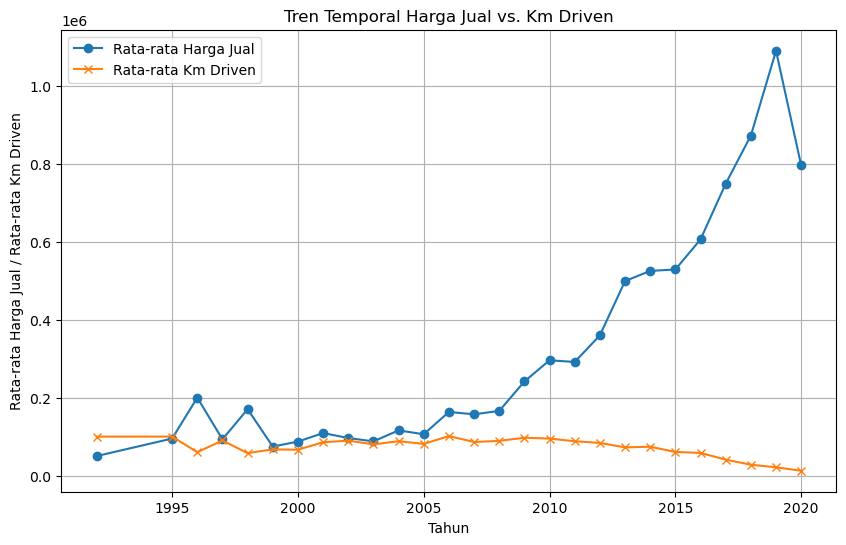

In [36]:
# Mengelompokkan data berdasarkan tahun pembuatan ('year')
grouped = train_set.groupby('year')

# Menghitung rata-rata harga jual dan kilometer yang ditempuh setiap tahun
avg_selling_price = grouped['selling_price'].mean()
avg_km_driven = grouped['km_driven'].mean()

# Membuat plot tren harga jual dan kilometer yang ditempuh
plt.figure(figsize=(10, 6))
plt.plot(avg_selling_price.index, avg_selling_price.values, marker='o', label='Rata-rata Harga Jual')
plt.plot(avg_km_driven.index, avg_km_driven.values, marker='x', label='Rata-rata Km Driven')
plt.title('Tren Temporal Harga Jual vs. Km Driven')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Harga Jual / Rata-rata Km Driven')
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()

### Tren Temporal Selling Price dan fuel

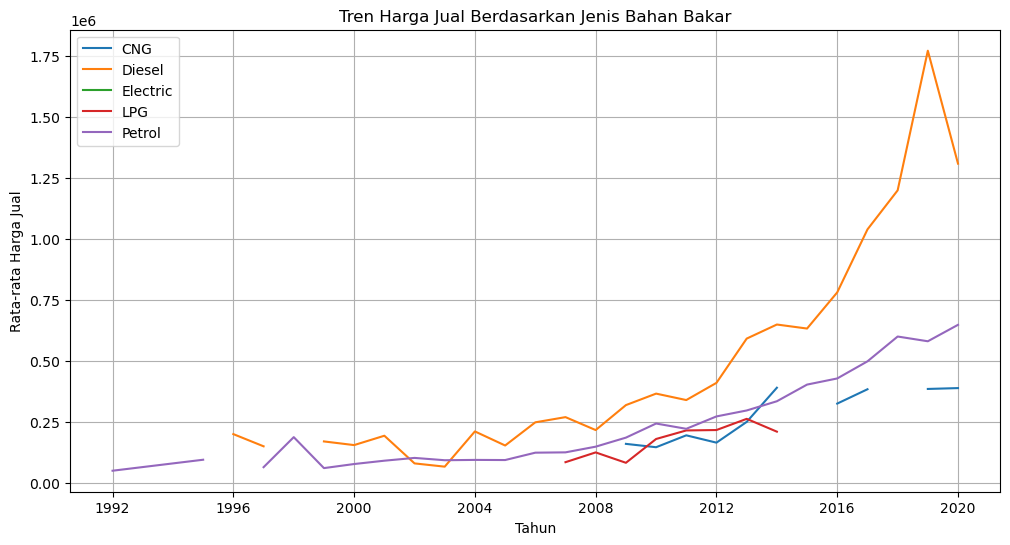

In [38]:
# Pastikan kolom 'year' adalah dalam format datetime
train_set['year'] = pd.to_datetime(train_set['year'], format='%Y')

# Kelompokkan data berdasarkan tahun dan jenis bahan bakar
grouped = train_set.groupby(['year', 'fuel'])

# Hitung rata-rata harga jual untuk setiap kombinasi tahun dan jenis bahan bakar
avg_selling_price = grouped['selling_price'].mean().unstack()

# Membuat plot tren harga jual berdasarkan jenis bahan bakar
plt.figure(figsize=(12, 6))
for fuel_type in avg_selling_price.columns:
    plt.plot(avg_selling_price.index, avg_selling_price[fuel_type], label=fuel_type)

plt.title('Tren Harga Jual Berdasarkan Jenis Bahan Bakar')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Harga Jual')
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()

### Tren Temporal Selling Price dan transmission

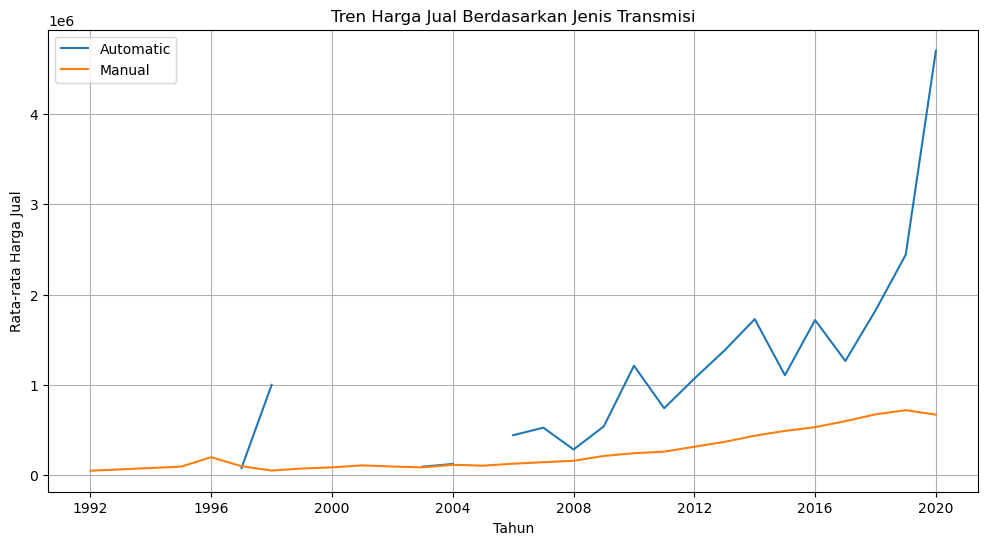

In [39]:
# Pastikan kolom 'year' adalah dalam format datetime
train_set['year'] = pd.to_datetime(train_set['year'], format='%Y')

# Kelompokkan data berdasarkan tahun dan jenis transmisi
grouped = train_set.groupby(['year', 'transmission'])

# Hitung rata-rata harga jual untuk setiap kombinasi tahun dan jenis transmisi
avg_selling_price = grouped['selling_price'].mean().unstack()

# Membuat plot tren harga jual berdasarkan jenis transmisi
plt.figure(figsize=(12, 6))
for transmission_type in avg_selling_price.columns:
    plt.plot(avg_selling_price.index, avg_selling_price[transmission_type], label=transmission_type)

plt.title('Tren Harga Jual Berdasarkan Jenis Transmisi')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Harga Jual')
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()

### Tren Temporal Selling Price dan seller_type

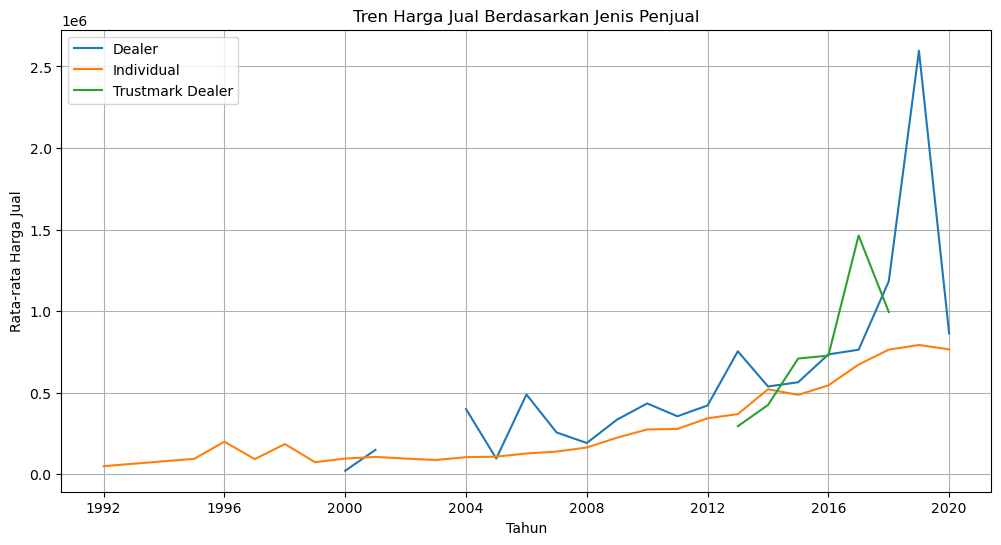

In [40]:
# Pastikan kolom 'year' adalah dalam format datetime
train_set['year'] = pd.to_datetime(train_set['year'], format='%Y')

# Kelompokkan data berdasarkan tahun dan jenis penjual
grouped = train_set.groupby(['year', 'seller_type'])

# Hitung rata-rata harga jual untuk setiap kombinasi tahun dan jenis penjual
avg_selling_price = grouped['selling_price'].mean().unstack()

# Membuat plot tren harga jual berdasarkan jenis penjual
plt.figure(figsize=(12, 6))
for seller_type in avg_selling_price.columns:
    plt.plot(avg_selling_price.index, avg_selling_price[seller_type], label=seller_type)

plt.title('Tren Harga Jual Berdasarkan Jenis Penjual')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Harga Jual')
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()

### Tren Temporal Selling Price dan owner

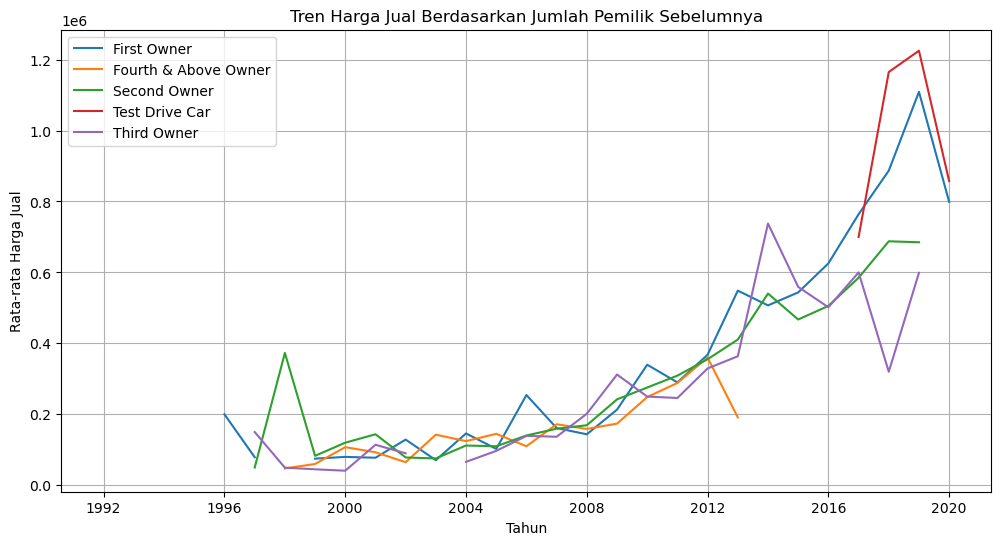

In [41]:
# Pastikan kolom 'year' adalah dalam format datetime
train_set['year'] = pd.to_datetime(train_set['year'], format='%Y')

# Kelompokkan data berdasarkan tahun dan jumlah pemilik sebelumnya
grouped = train_set.groupby(['year', 'owner'])

# Hitung rata-rata harga jual untuk setiap kombinasi tahun dan jumlah pemilik sebelumnya
avg_selling_price = grouped['selling_price'].mean().unstack()

# Membuat plot tren harga jual berdasarkan jumlah pemilik sebelumnya
plt.figure(figsize=(12, 6))
for owner_type in avg_selling_price.columns:
    plt.plot(avg_selling_price.index, avg_selling_price[owner_type], label=owner_type)

plt.title('Tren Harga Jual Berdasarkan Jumlah Pemilik Sebelumnya')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Harga Jual')
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()

## Pair Plot

<Figure size 640x480 with 0 Axes>

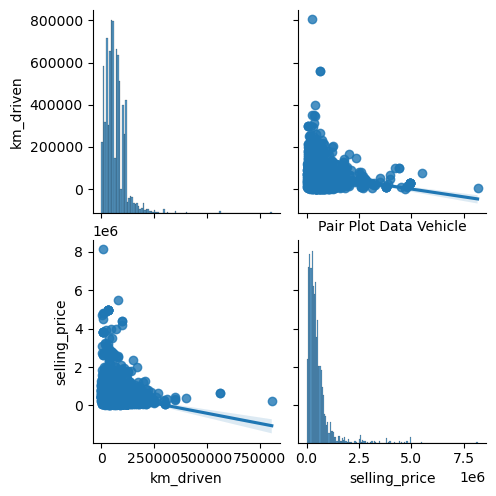

In [45]:
#Membentuk visualisasi dengan pair plot
plt.figure()
sns.pairplot(train_set, kind='reg')
plt.title('Pair Plot Data Vehicle', fontsize=10)
plt.show()

## Kesimpulan


1. data tidak mengandung missing value
2. Imputasi Mean : year dan Imputasi Median = km_driven
3. Outlier tidak dilakukan handling apapun karena merupakan data yang bisa saja terjadi didunia nyata
4. proporsi data pada kolom Fuel terbanyak disandang oleh mobil yang berbahan bakar Diesel sebanyak 1509 dengan persentase 49.67% dan yang terendah ialah electric sebanyak 1 dengan persentase 0.03%
5. proporsi data pada kolom seller_type terbanyak disandang oleh tipe penjual individual sebanyak 2265 dengan persentase 74.56% dan yang terendah ialah trustmark Dealer sebanyak 68 dengan persentase 2.24%
6. proporsi data pada kolom transmission terbanyak disandang oleh tipe transmisi manual sebanyak 2733 dengan persentase 89.96% dan yang terendah ialah Automatic sebanyak 305 dengan persentase 10.04%
8. proporsi data pada kolom owner terbanyak disandang oleh tipe owner First Owner sebanyak 1973 dengan persentase 64.94% dan yang terendah ialah Test Drive Carsebanyak 12 dengan persentase 0.39%
9. Secara korelasi, korelasi positif terdapat pada variabel year dan selling_price sebesar 0.41, km_driven dan selling_price memiliki korelasi negatif sebesar -0.18, dan yang terakhir km_driven dan year memiliki korelasi negatif sebesar -0.4
10. Setelah dicek menggunakan pengujian anova variabel fuel, seller_type, transmission, dan owner yang masing masing value dari kolomnya terdapat perbedaan signifikan dalam rata-rata harga jual atau selling_price, yang berarti masing masing variabel dapat memberikan dampak signifikan terhadap harga jual atau selling_price
11. Tren Temporal Selling Price dari masing-masing variabel cenderung mengalami pola fluktuatif